In [31]:
import numpy as np  
import pandas as pd 
df=pd.read_csv('data/housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [32]:
binary_cols = [
    'mainroad', 'guestroom', 'basement',
    'hotwaterheating', 'airconditioning', 'prefarea'
]

df[binary_cols] = df[binary_cols].apply(lambda x: x.map({'yes': 1, 'no': 0}))


In [33]:
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)


In [ ]:
df.isnull().sum()


price                              0
area                               0
bedrooms                           0
bathrooms                          0
stories                            0
mainroad                           0
guestroom                          0
basement                           0
hotwaterheating                    0
airconditioning                    0
parking                            0
prefarea                           0
furnishingstatus_semi-furnished    0
furnishingstatus_unfurnished       0
dtype: int64

In [35]:
df.fillna(df.median(), inplace=True)

In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

num_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])


In [66]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [68]:
X_train.isna().sum()


area                               0
bedrooms                           0
bathrooms                          0
stories                            0
mainroad                           0
guestroom                          0
basement                           0
hotwaterheating                    0
airconditioning                    0
parking                            0
prefarea                           0
furnishingstatus_semi-furnished    0
furnishingstatus_unfurnished       0
dtype: int64

In [69]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [71]:
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

coefficients.sort_values(by='Coefficient', ascending=False)


,Feature,Coefficient
8,airconditioning,0.423512
7,hotwaterheating,0.366373
10,prefarea,0.337070
2,bathrooms,0.294009
0,area,0.273778
6,basement,0.208833
4,mainroad,0.196883
3,stories,0.188984
5,guestroom,0.123940
9,parking,0.103570


In [72]:
y_pred = model.predict(X_test)


In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R²:", r2)


MAE: 0.5190943190276344
MSE: 0.5023642289784902
R²: 0.6529242642153174


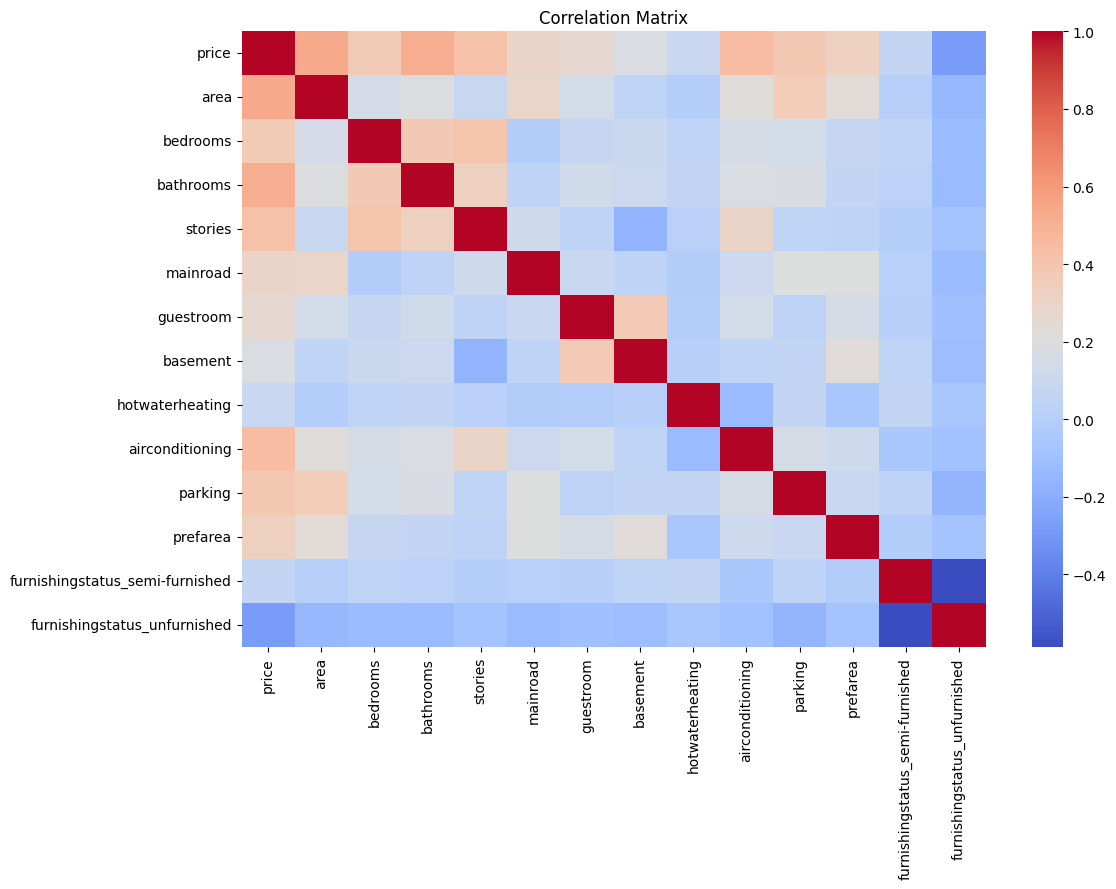

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Matrix")
plt.show()


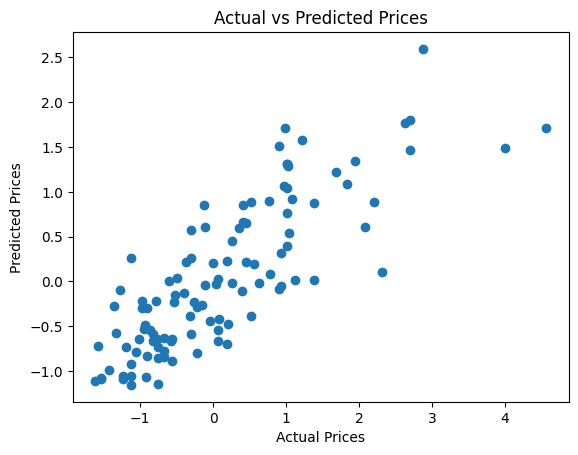

In [75]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.show()


In [ ]:
new_house = pd.DataFrame({
    'area': [2400],
    'bedrooms': [4],
    'bathrooms': [3],
    'stories': [2],
    'mainroad': [1],
    'guestroom': [0],
    'basement': [1],
    'hotwaterheating': [0],
    'airconditioning': [1],
    'parking': [2],
    'prefarea': [1],
    'furnishingstatus_semi-furnished': [1],
    'furnishingstatus_unfurnished': [0]
})


In [79]:
new_house[num_cols] = scaler.transform(new_house[num_cols])



In [80]:
predicted_price = model.predict(new_house)
print("Predicted House Price (scaled):", predicted_price)


Predicted House Price (scaled): [659.34538833]
